# Assignment 2 by: Linh Thuy Do (s3927777)


In [2]:
# Linh Thuy Do
# s3927777

# Task 1: Regression


In [4]:
# Import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Load the dataset (Change the location path in your devices)
data = pd.read_csv('A2data.csv', delimiter=';')

# Display the first few rows to understand its structure
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [6]:
# Convert columns to numeric, forcing invalid parsing (like spaces) to NaN
data['alcohol'] = pd.to_numeric(data['alcohol'], errors='coerce')
data['density'] = pd.to_numeric(data['density'], errors='coerce')

# Drop any rows with NaN values after conversion
data = data.dropna(subset=['alcohol', 'density'])

# Check if the data is now clean
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6
4777,6.6,0.32,0.36,8,0.047,57,168,0.99490,3.15,0.46,9.6,5
4778,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4779,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [7]:
# Take a random sample of 200 rows, ensuring no missing values
sample_data = data.dropna().sample(n=200, random_state=42)

# Write the sample to a CSV file
sample_data.to_csv('s3927777-A2SampleOne.csv', index=False)

# Select only the 'alcohol' and 'density' columns for further analysis
sample_data = sample_data[['alcohol', 'density']]

In [8]:
sample_data

,alcohol,density
1985,10.1,0.99240
1559,11.5,0.99380
298,10.0,0.99410
2517,10.0,0.99228
4349,12.2,0.99124
...,...,...
767,9.5,0.99920
3195,13.3,0.98916
2557,9.2,0.99354
4452,10.5,0.99630


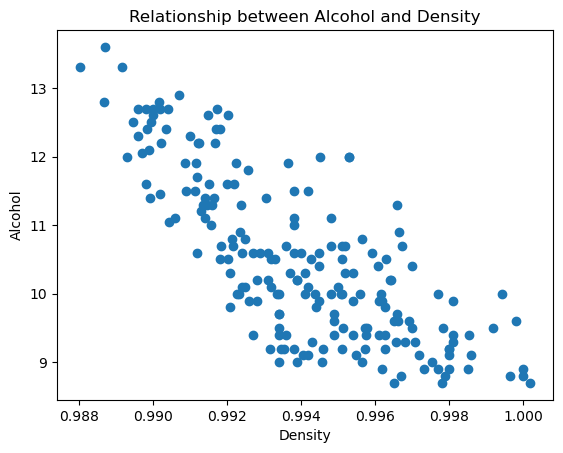

In [9]:
# Plot the relationship between alcohol and density
plt.scatter(sample_data['density'], sample_data['alcohol'])
plt.title('Relationship between Alcohol and Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

In [10]:
# Define the independent (X) and dependent (y) variables
X = sample_data[['density']]
y = sample_data['alcohol']

# Build and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Density: {model.coef_[0]}")

Intercept: 354.38439393734063
Coefficient for Density: -345.97496947927755


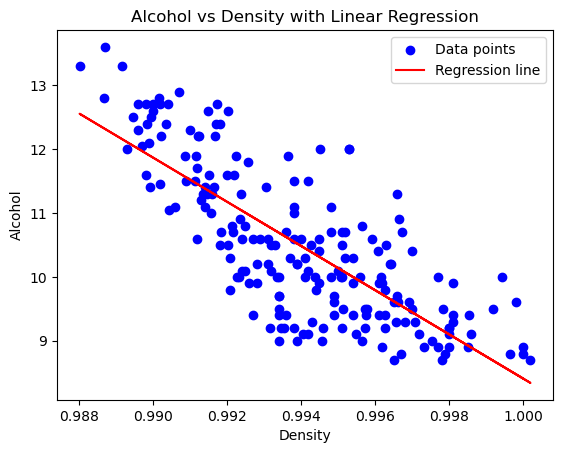

In [11]:
# Plot the data points
plt.scatter(sample_data['density'], sample_data['alcohol'], color='blue', label='Data points')

# Plot the regression line
plt.plot(sample_data['density'], model.predict(X), color='red', label='Regression line')

plt.title('Alcohol vs Density with Linear Regression')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

# Task 2: Classification

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Load the dataset
file_path = 'A2data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [15]:
# Reload the dataset with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to verify correct loading
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [16]:
# Take a random sample of 500 instances
sample_data = data.sample(n=500, random_state=42)

# Check for any missing values in the uncleaned sample
missing_values = sample_data.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 0
quality                 0
dtype: int64

In [17]:
# Clean the dataset by converting all values to numeric and dropping rows with non-numeric values
def clean_data(df):
    # Convert columns to numeric, coerce errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with NaN values (after coercion)
    df_cleaned = df.dropna()
    
    return df_cleaned

# Apply cleaning function to the sample data
clean_sample_data = clean_data(sample_data)

In [18]:
# Check for any remaining missing values in the cleaned data
missing_values_after_cleaning = clean_sample_data.isnull().sum()

In [19]:
# Save the cleaned sample to a CSV file
sample_file_path = 's3927777-A2SampleTwo.csv'
clean_sample_data.to_csv(sample_file_path, index=False)

# Display the missing value count after cleaning and the file path of the saved sample
missing_values_after_cleaning, sample_file_path

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 's3927777-A2SampleTwo.csv')

In [20]:
# Split the data into features (X) and target (y)
# The 'quality' column is the target, and the remaining 11 columns are the features
X = clean_sample_data.drop(columns=['quality'])
y = clean_sample_data['quality']

In [21]:
X.shape

(496, 11)

In [22]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## kNN

In [24]:
# Check the class distribution of the target variable 'y'
print(y_train.value_counts())

quality
6    184
5    116
7     66
8     16
4     10
9      2
3      2
Name: count, dtype: int64


In [25]:
# Train kNN classifier on the resampled dataset
k = 3  # We can experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.34

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.26      0.32      0.29        34
           6       0.46      0.47      0.46        45
           7       0.29      0.15      0.20        13
           8       1.00      0.00      0.00         3
           9       1.00      0.00      0.00         1

    accuracy                           0.34       100
   macro avg       0.50      0.16      0.16       100
weighted avg       0.37      0.34      0.33       100



In [26]:
print(confusion_matrix(y_test, y_pred))

[[ 0  4  0  0  0  0]
 [ 3 11 17  3  0  0]
 [ 1 23 21  0  0  0]
 [ 0  4  7  2  0  0]
 [ 0  1  1  1  0  0]
 [ 0  0  0  1  0  0]]


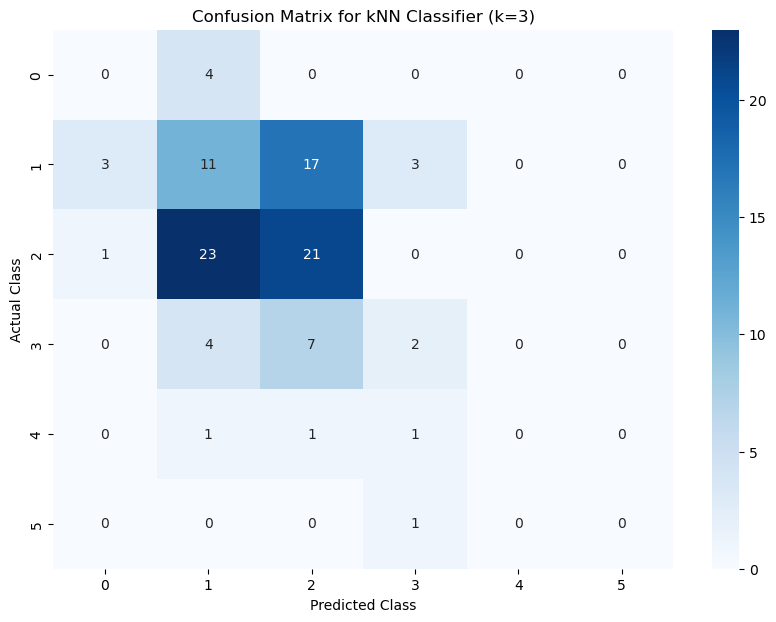

In [27]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for kNN Classifier (k={k})")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

## modified kNN 

In [29]:
# Initialize the modified kNN classifier with distance-based weighting
modified_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
modified_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_modified_knn = modified_knn.predict(X_test)

# Evaluate the weighted kNN classifier
accuracy_modified_knn = accuracy_score(y_test, y_pred_modified_knn)
report_modified_knn = classification_report(y_test, y_pred_modified_knn, zero_division=1)
conf_matrix_modified_knn = confusion_matrix(y_test, y_pred_modified_knn)

# Display the results for weighted kNN
print("Weighted kNN Classifier Accuracy:", accuracy_modified_knn)
print("\nClassification Report for Weighted kNN:\n", report_modified_knn)

Weighted kNN Classifier Accuracy: 0.39

Classification Report for Weighted kNN:
               precision    recall  f1-score   support

           4       1.00      0.00      0.00         4
           5       0.33      0.38      0.35        34
           6       0.48      0.53      0.51        45
           7       0.25      0.15      0.19        13
           8       0.00      0.00      0.00         3
           9       1.00      0.00      0.00         1

    accuracy                           0.39       100
   macro avg       0.51      0.18      0.17       100
weighted avg       0.41      0.39      0.37       100



In [30]:
print(confusion_matrix(y_test, y_pred_modified_knn))

[[ 0  4  0  0  0  0]
 [ 0 13 18  3  0  0]
 [ 0 18 24  1  2  0]
 [ 0  4  7  2  0  0]
 [ 0  1  1  1  0  0]
 [ 0  0  0  1  0  0]]


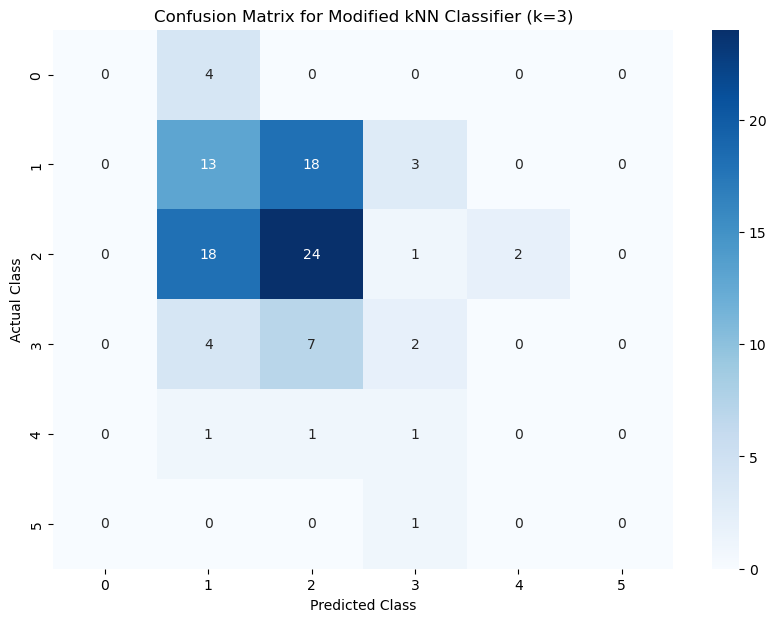

In [31]:
# Plot confusion matrix for Weighted kNN
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_modified_knn, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for Modified kNN Classifier (k={k})")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

## Decision Tree & comparison

### Decision Tree

In [34]:
# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the Decision Tree classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree, zero_division=1)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Display the results for the Decision Tree
print("Decision Tree Classifier Accuracy:", accuracy_tree)
print("\nClassification Report for Decision Tree:\n", report_tree)

Decision Tree Classifier Accuracy: 0.46

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.55      0.47      0.51        34
           6       0.56      0.62      0.59        45
           7       0.15      0.15      0.15        13
           8       0.00      0.00      0.00         3
           9       1.00      0.00      0.00         1

    accuracy                           0.46       100
   macro avg       0.38      0.21      0.21       100
weighted avg       0.47      0.46      0.46       100



In [35]:
print(confusion_matrix(y_test, y_pred_tree))

[[ 0  2  0  2  0  0]
 [ 1 16 14  3  0  0]
 [ 1 10 28  4  2  0]
 [ 0  1  7  2  3  0]
 [ 0  0  1  2  0  0]
 [ 0  0  0  0  1  0]]


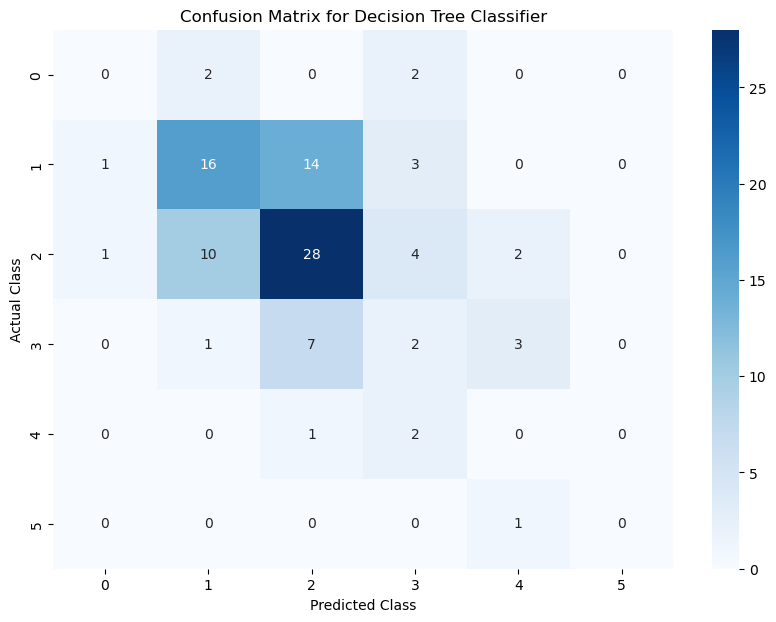

In [36]:
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

### Comparison of Models

In [38]:
# Display accuracy comparison
print("Accuracy Comparison:")
print(f"kNN Accuracy: {accuracy}")
print(f"Decision Tree Accuracy: {accuracy_tree}")

# Compare classification reports
print("\nClassification Report Comparison:")
print("kNN Classification Report:\n", report)
print("Decision Tree Classification Report:\n", report_tree)

Accuracy Comparison:
kNN Accuracy: 0.34
Decision Tree Accuracy: 0.46

Classification Report Comparison:
kNN Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.26      0.32      0.29        34
           6       0.46      0.47      0.46        45
           7       0.29      0.15      0.20        13
           8       1.00      0.00      0.00         3
           9       1.00      0.00      0.00         1

    accuracy                           0.34       100
   macro avg       0.50      0.16      0.16       100
weighted avg       0.37      0.34      0.33       100

Decision Tree Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.55      0.47      0.51        34
           6       0.56      0.62      0.59        45
           7       0.15      0.15      0.15        13
           8    

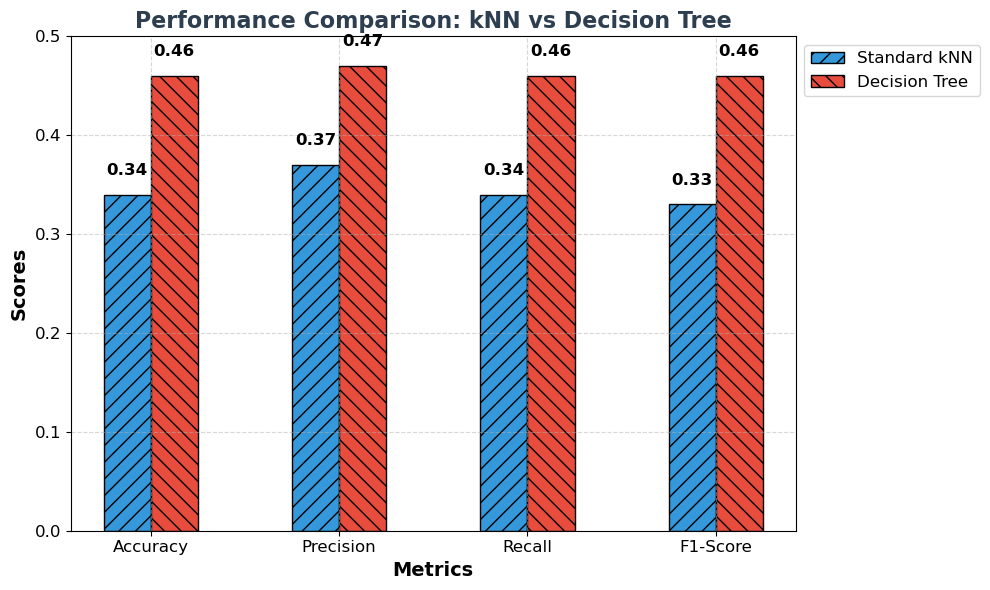

In [39]:
# Data from models' results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_results = [0.34, 0.37, 0.34, 0.33]  # Distance weighting of standard kNN
decision_tree_result = [0.46, 0.47, 0.46, 0.46]  # Distance weighting of Decision tree

# Bar width and index for comparison
bar_width = 0.25
index = np.arange(len(metrics))

# Create the plot
plt.figure(figsize=(10, 6))

# Bar plots
plt.bar(index, knn_results, bar_width, label='Standard kNN', color='#3498db', edgecolor='black', hatch='//')
plt.bar(index + bar_width, decision_tree_result, bar_width, label='Decision Tree', color='#e74c3c', edgecolor='black', hatch='\\\\')

# Labels and title
plt.xlabel('Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Scores', fontsize=14, fontweight='bold')
plt.title('Performance Comparison: kNN vs Decision Tree', fontsize=16, fontweight='bold', color='#2c3e50')

# X-ticks and Y-ticks
plt.xticks(index + bar_width / 2, metrics, fontsize=12)
plt.yticks(np.arange(0, 0.6, 0.1), fontsize=12)

# Add grid with reduced opacity
plt.grid(True, linestyle='--', alpha=0.5)

# Add value annotations
for i in range(len(metrics)):
    plt.text(i, knn_results[i] + 0.02, f'{knn_results[i]:.2f}', ha='center', fontsize=12, fontweight='bold')
    plt.text(i + bar_width, decision_tree_result[i] + 0.02, f'{decision_tree_result[i]:.2f}', ha='center', fontsize=12, fontweight='bold')

# Legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

# Task 3: Clustering

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
import os

In [42]:
# Set the environment variable
os.environ["OMP_NUM_THREADS"] = "2"

In [43]:
# Load the dataset
file_path = 'A2data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [44]:
# Reload the dataset with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to verify correct loading
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [45]:
# Taking a random sample of 300 instances
data_sample = data.sample(n=300, random_state=42)

In [46]:
# Convert all columns to numeric, coercing errors to NaN
X = data_sample.drop(columns=['quality']).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any are introduced)
X_cleaned = X.dropna()

In [47]:
X_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2895,7.7,0.25,0.30,7.80,0.038,67.0,196.0,0.99555,3.10,0.50,10.1
4430,6.1,0.27,0.32,1.10,0.034,24.0,110.0,0.98980,3.36,0.40,12.5
3618,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1
763,6.9,0.22,0.37,15.00,0.053,59.0,178.0,0.99920,3.37,0.82,9.5
4392,7.0,0.28,0.28,1.40,0.039,12.0,83.0,0.99173,3.18,0.65,11.1
...,...,...,...,...,...,...,...,...,...,...,...
1773,6.7,0.37,0.41,6.30,0.061,22.0,149.0,0.99530,3.16,0.47,9.6
2810,6.5,0.37,0.33,3.50,0.036,23.0,92.0,0.99136,3.18,0.38,11.2
4490,5.7,0.22,0.28,1.30,0.027,26.0,101.0,0.98948,3.35,0.38,12.5
589,6.3,0.26,0.49,1.50,0.052,34.0,134.0,0.99240,2.99,0.61,9.8


In [48]:
# Save the sample for submission
sample_file_path = 's3927777-A2SampleThree.csv'
data_sample.to_csv(sample_file_path, index=False)

## k-Means 

In [50]:
# Function to run k-Means clustering for multiple values of k
def run_kmeans(X, k_values):
    kmeans_results = []  # Store results for each value of k
    best_silhouette = None  # Variable to store the best silhouette score
    
    for k in k_values:
        # Initialize the k-means with n_init=10 to suppress warnings
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(X)  # Fit and predict the labels

        # Compute performance metrics
        inertia = kmeans.inertia_
        silhouette_avg = silhouette_score(X, kmeans_labels)
        ch_score = calinski_harabasz_score(X, kmeans_labels)

        # Append the results (k, inertia, silhouette, calinski-harabasz)
        kmeans_results.append((k, inertia, silhouette_avg, ch_score))

        # Update best silhouette score if necessary
        if best_silhouette is None or silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg

        # Print the Calinski-Harabasz Score for each k
        print(f"k={k}, Inertia={inertia}, Silhouette Score={silhouette_avg}, Calinski-Harabasz Score={ch_score}")

    return kmeans_results, best_silhouette

k=2, Inertia=200242.85887241235, Silhouette Score=0.5198336681077611, Calinski-Harabasz Score=456.04111491429313
k=3, Inertia=135116.60437739125, Silhouette Score=0.3894022866437597, Calinski-Harabasz Score=407.39019798543023
k=4, Inertia=105106.90184165191, Silhouette Score=0.34249764208653505, Calinski-Harabasz Score=375.736373992797
k=5, Inertia=85474.99557796872, Silhouette Score=0.341722402577964, Calinski-Harabasz Score=362.0491516363748
k=6, Inertia=74039.77651864017, Silhouette Score=0.322264823550235, Calinski-Harabasz Score=342.1821118234536
k=7, Inertia=66251.68515549481, Silhouette Score=0.3051057702438639, Calinski-Harabasz Score=323.2355063785881
k=8, Inertia=57297.59495337058, Silhouette Score=0.3266510451614894, Calinski-Harabasz Score=325.67699555485495
k=9, Inertia=50758.00523130884, Silhouette Score=0.3349510271260388, Calinski-Harabasz Score=325.187297203416
k=10, Inertia=45705.27240923779, Silhouette Score=0.33660235411905903, Calinski-Harabasz Score=323.4050817283

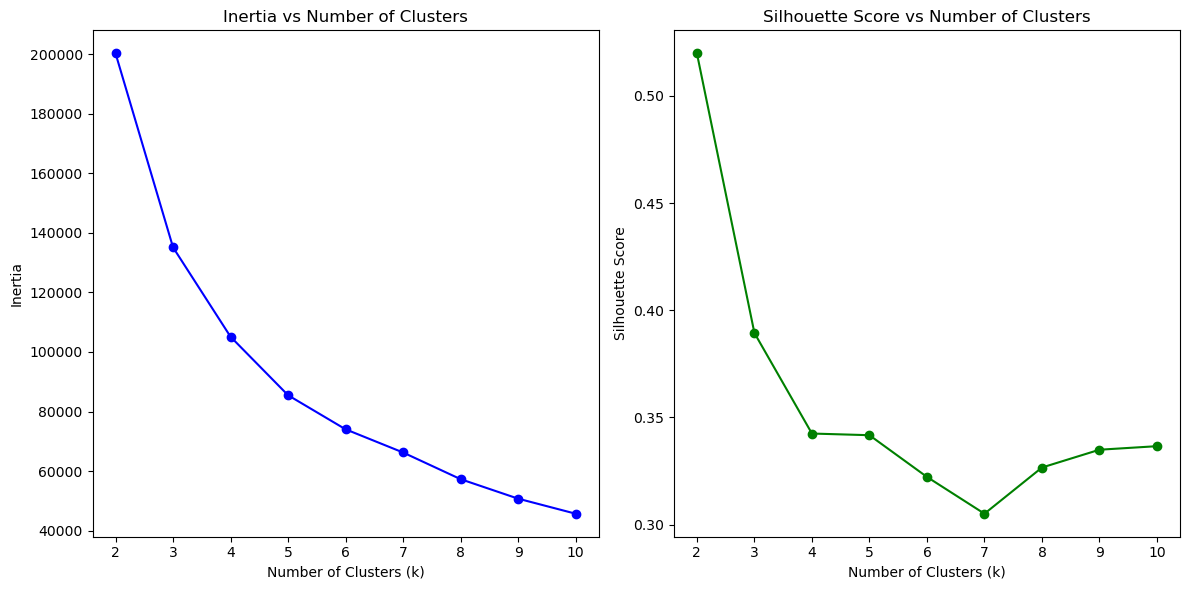

In [51]:
# Run k-Means for multiple values of k
k_values = range(2, 11)  # Testing k from 2 to 10
kmeans_results, kmeans_silhouette = run_kmeans(X_cleaned, k_values)

# Plotting the k-Means results (Inertia, Silhouette and Calinski-harabasz Score)
k_values, inertia_values, silhouette_values, ch_values = zip(*kmeans_results)

# Plotting Inertia and Silhouette Score side by side
plt.figure(figsize=(12, 6))

# Plot for Inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', color='blue')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot for Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## DBSCAN & comparison 

In [53]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

In [54]:
def run_dbscan(X, eps_values, min_samples_values):
    best_eps = None
    best_min_samples = None
    best_score = -1
    dbscan_results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(X)
            
            # Calculate silhouette score only if there is more than one cluster
            unique_labels = set(dbscan_labels)
            if len(unique_labels) > 1:
                silhouette_avg = silhouette_score(X, dbscan_labels)
                dbscan_results.append((eps, min_samples, silhouette_avg, dbscan_labels))
                
                # Update best parameters if this score is better
                if silhouette_avg > best_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_score = silhouette_avg
                
                print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={silhouette_avg}")
            else:
                # Add the results even if there is a single cluster or all points are noise
                silhouette_avg = -1
                dbscan_results.append((eps, min_samples, silhouette_avg, dbscan_labels))
                print(f"eps={eps}, min_samples={min_samples}, resulted in a single cluster or all points are noise.")
    
    return dbscan_results, best_eps, best_min_samples, best_score

In [55]:
# Define a broader range of eps and min_samples to test
eps_values = np.arange(0.1, 1.1, 0.1)  # Larger range of eps values
min_samples_values = range(1, 6)  # More min_samples values

# Function to run DBSCAN
dbscan_results, best_eps, best_min_samples, best_score = run_dbscan(X_scaled, eps_values, min_samples_values)

# Analyzing DBSCAN results: Print the best silhouette score from DBSCAN
best_dbscan = max(dbscan_results, key=lambda x: x[2]) if dbscan_results else None
if best_dbscan:
    print(f"Best DBSCAN result: eps={best_dbscan[0]}, min_samples={best_dbscan[1]}, Silhouette Score={best_dbscan[2]}")
else:
    print("No valid DBSCAN clustering results.")

eps=0.1, min_samples=1, Silhouette Score=0.02702702702702703
eps=0.1, min_samples=2, Silhouette Score=-0.2067023243566675
eps=0.1, min_samples=3, resulted in a single cluster or all points are noise.
eps=0.1, min_samples=4, resulted in a single cluster or all points are noise.
eps=0.1, min_samples=5, resulted in a single cluster or all points are noise.
eps=0.2, min_samples=1, Silhouette Score=0.02702702702702703
eps=0.2, min_samples=2, Silhouette Score=-0.2067023243566675
eps=0.2, min_samples=3, resulted in a single cluster or all points are noise.
eps=0.2, min_samples=4, resulted in a single cluster or all points are noise.
eps=0.2, min_samples=5, resulted in a single cluster or all points are noise.
eps=0.30000000000000004, min_samples=1, Silhouette Score=0.037639425585969714
eps=0.30000000000000004, min_samples=2, Silhouette Score=-0.23614959571954844
eps=0.30000000000000004, min_samples=3, resulted in a single cluster or all points are noise.
eps=0.30000000000000004, min_samples=4

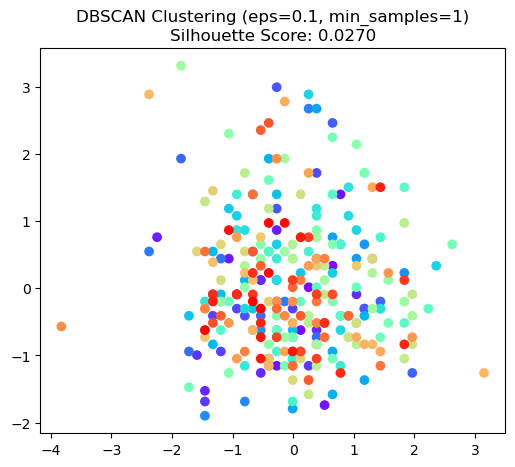

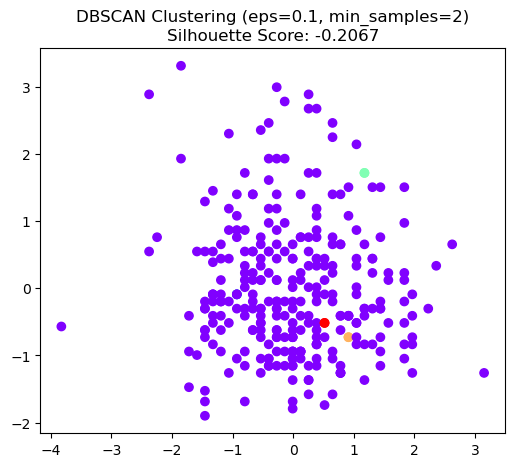

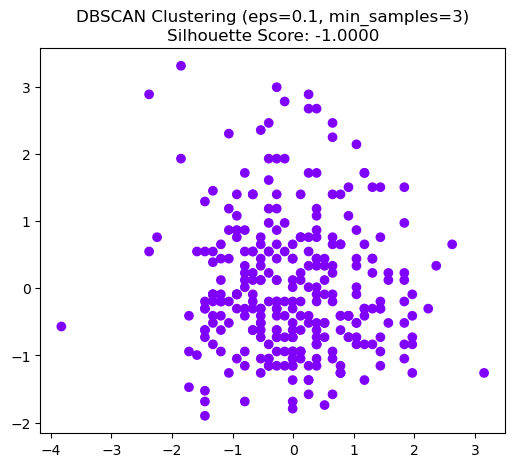

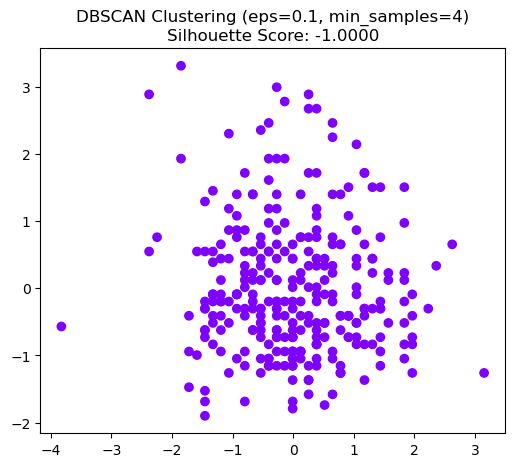

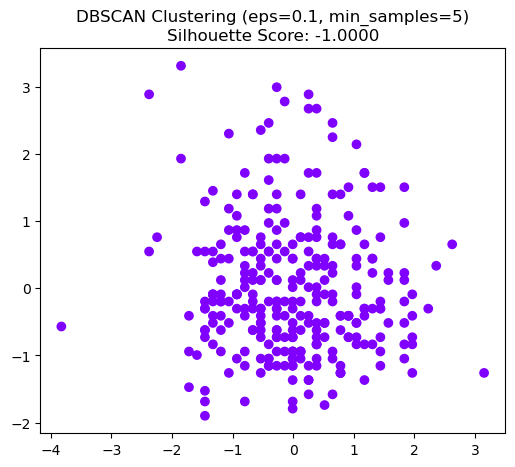

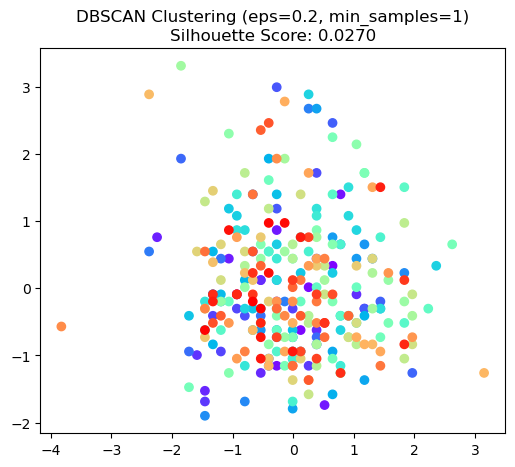

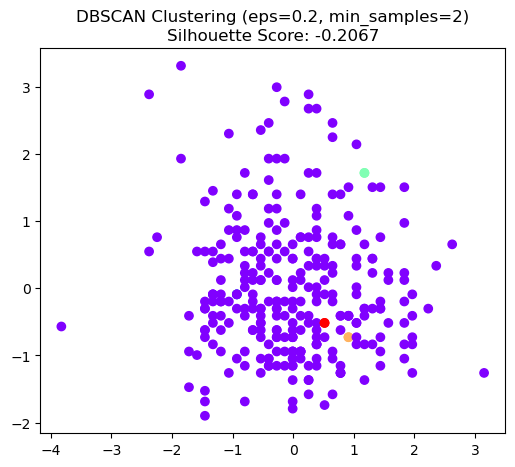

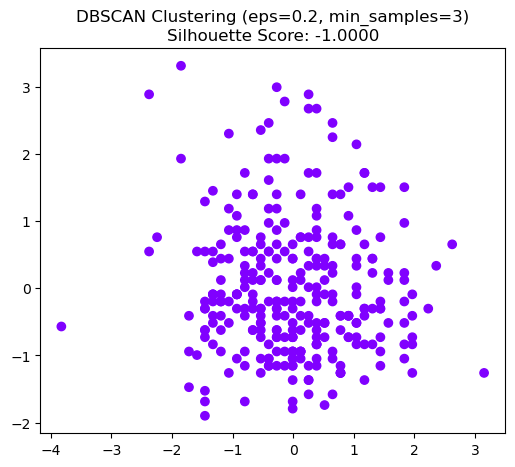

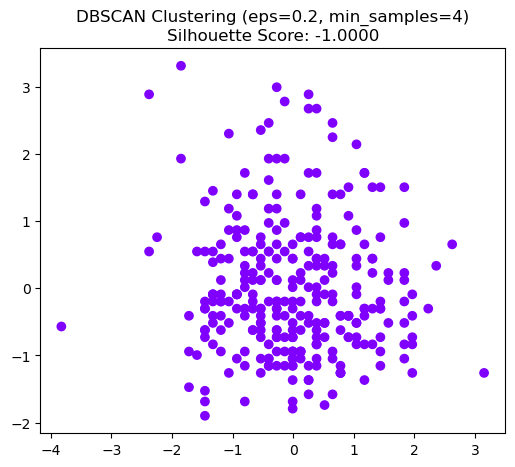

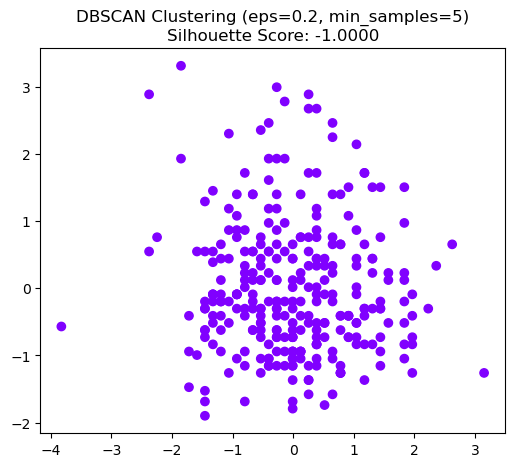

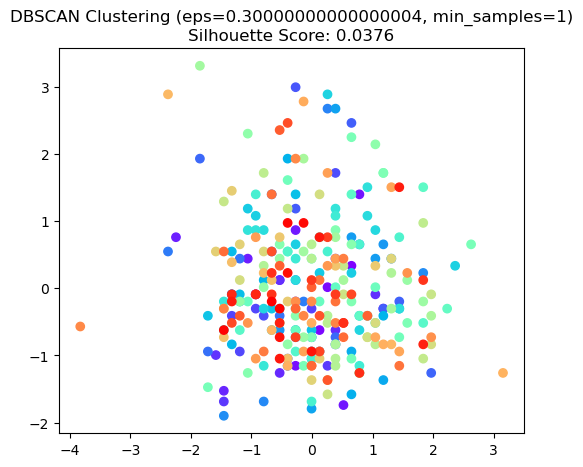

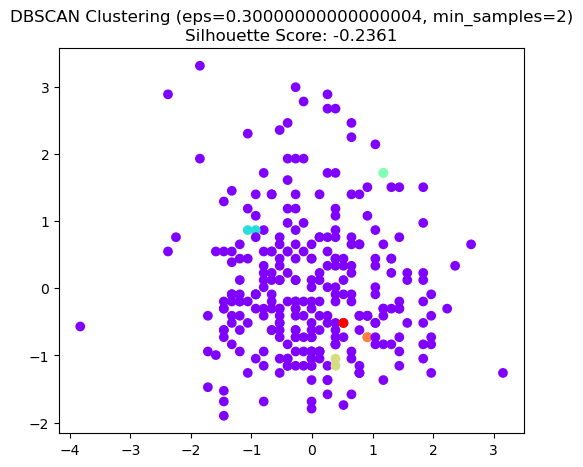

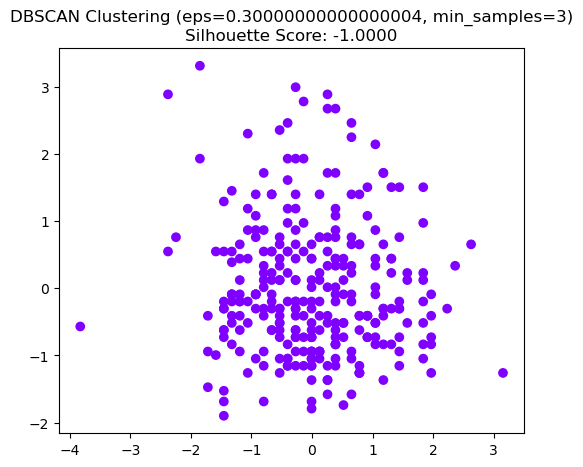

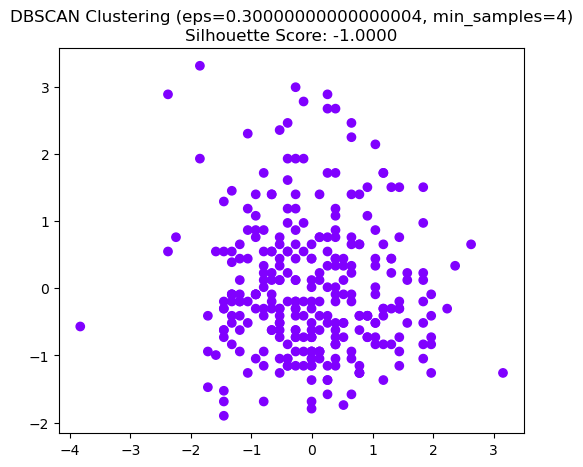

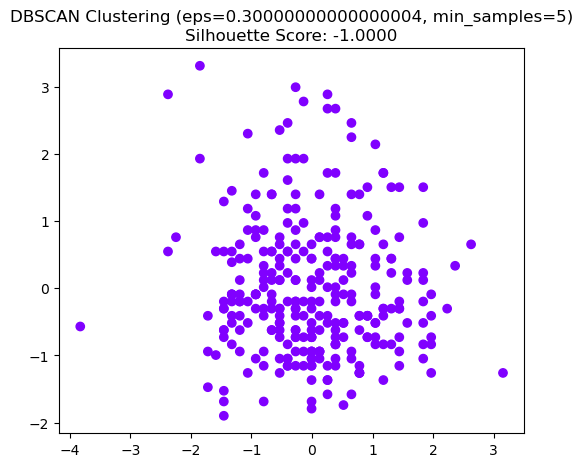

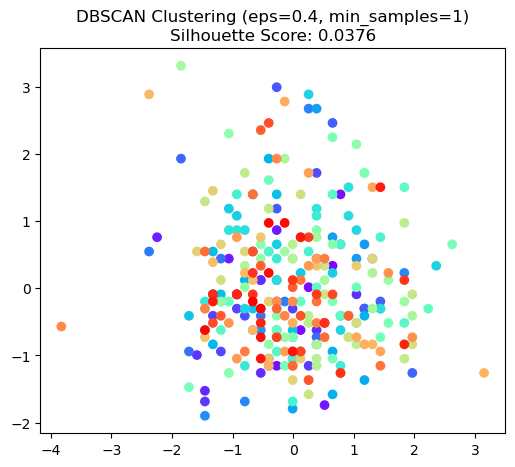

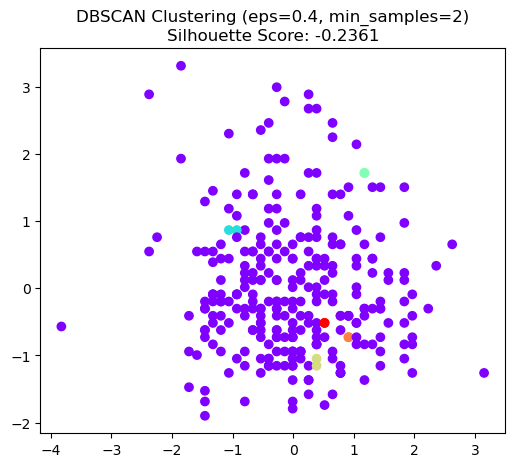

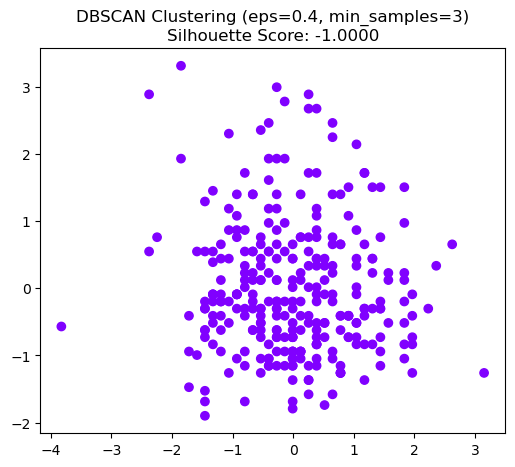

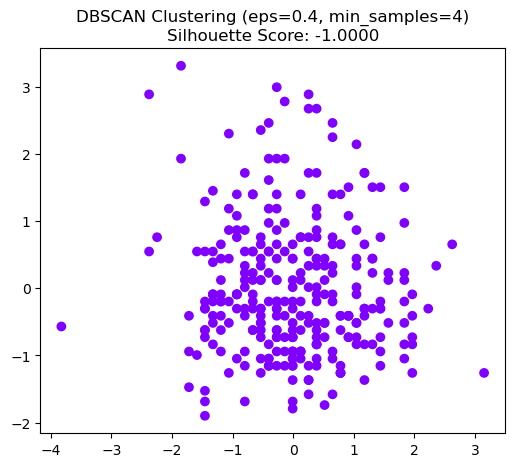

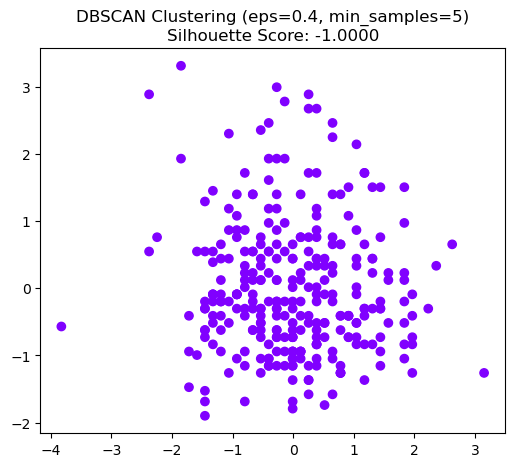

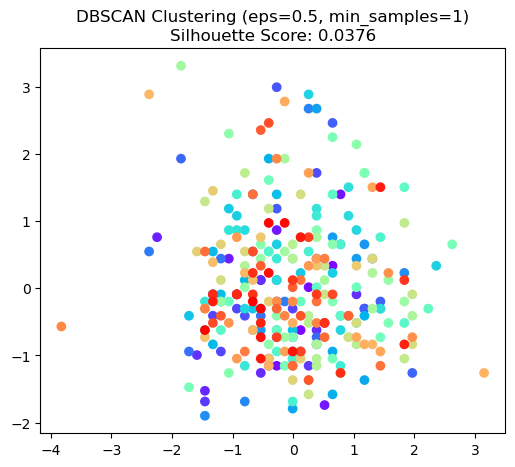

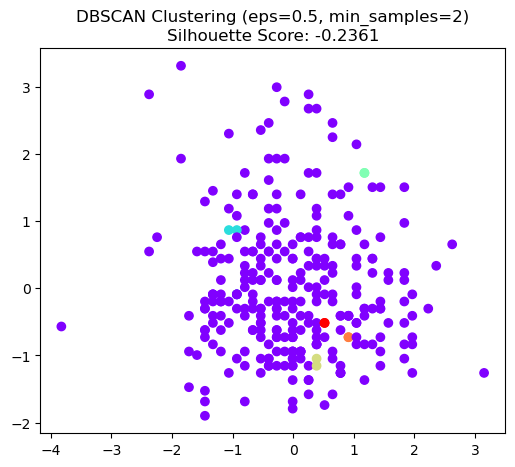

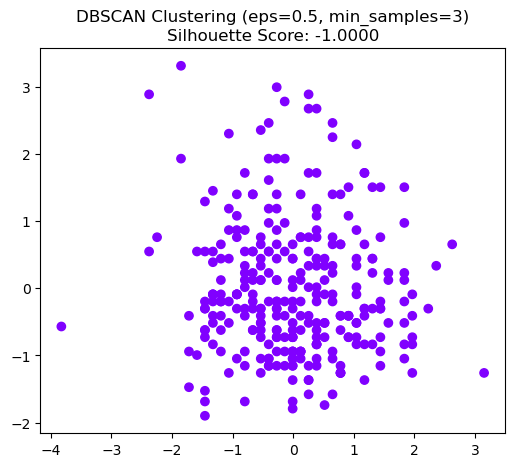

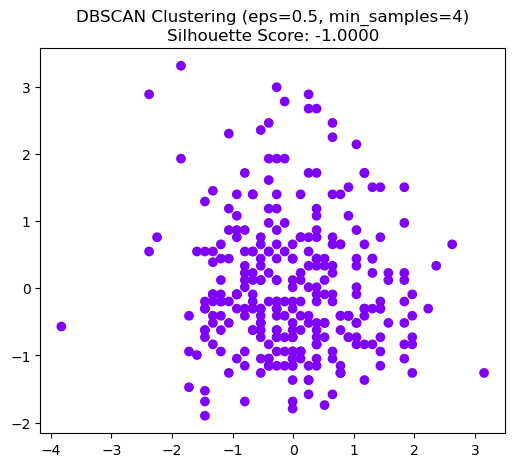

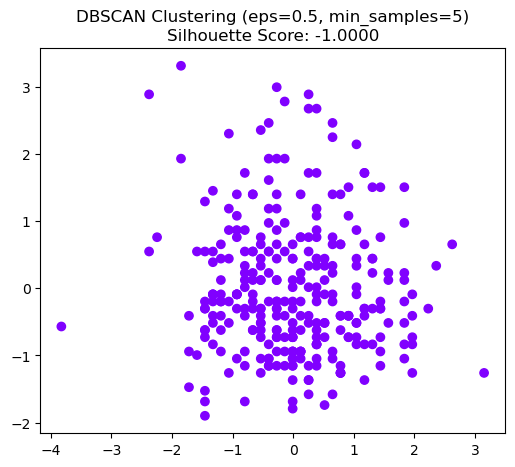

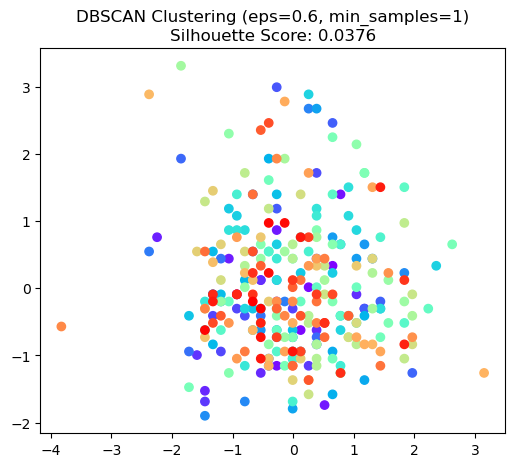

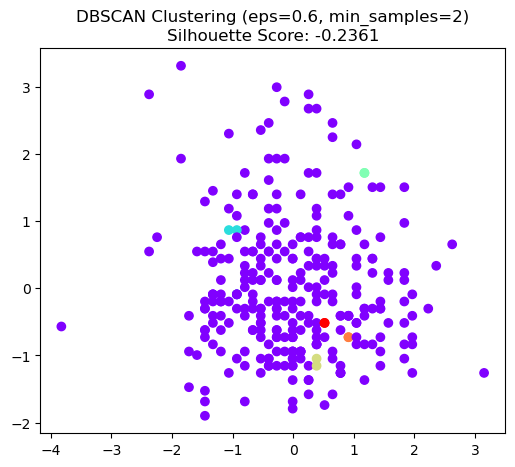

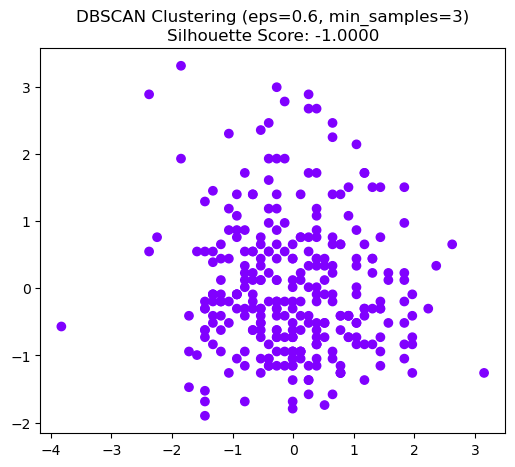

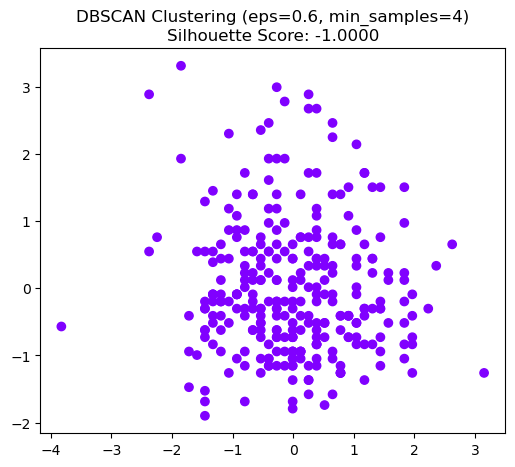

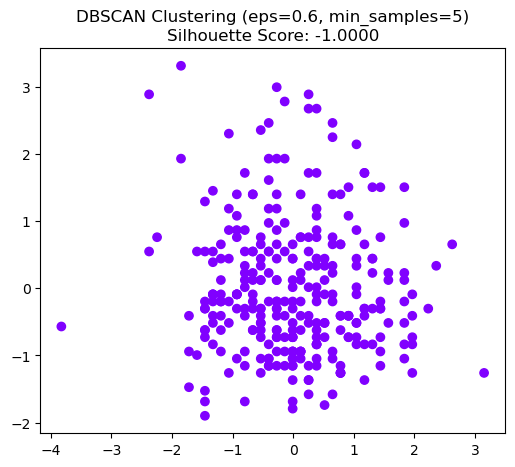

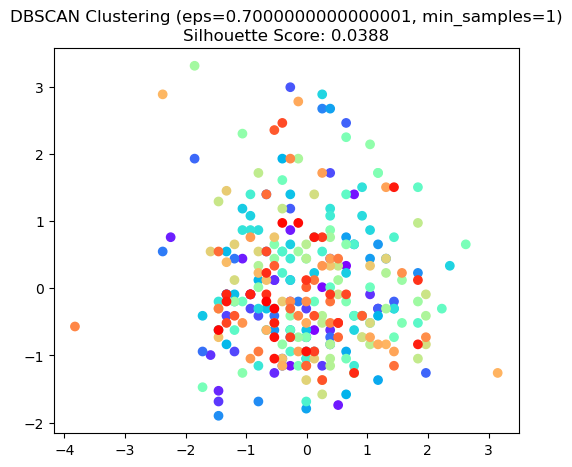

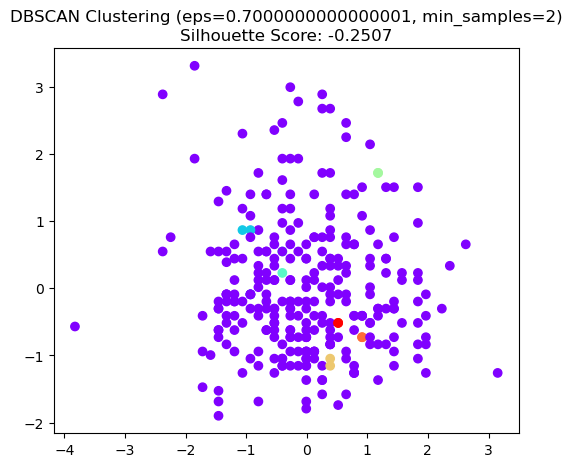

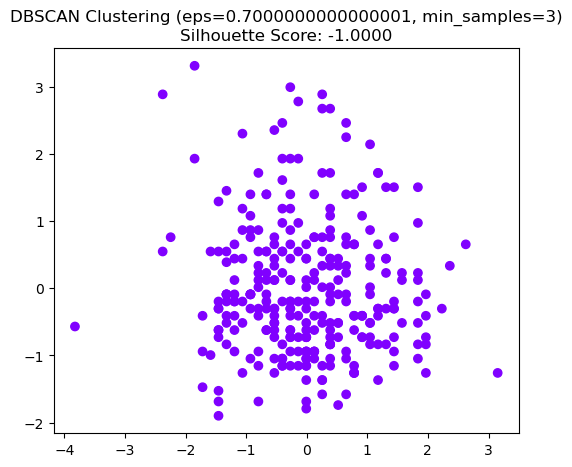

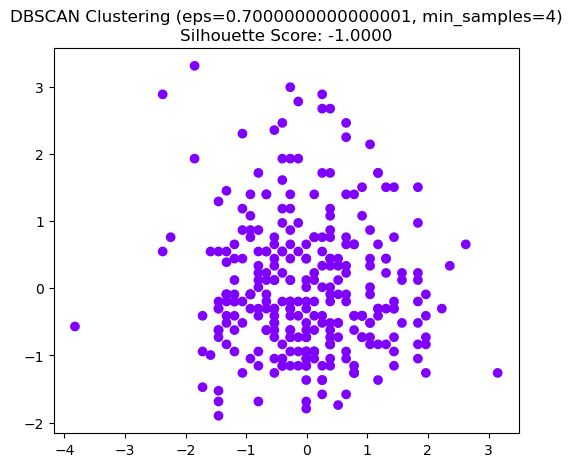

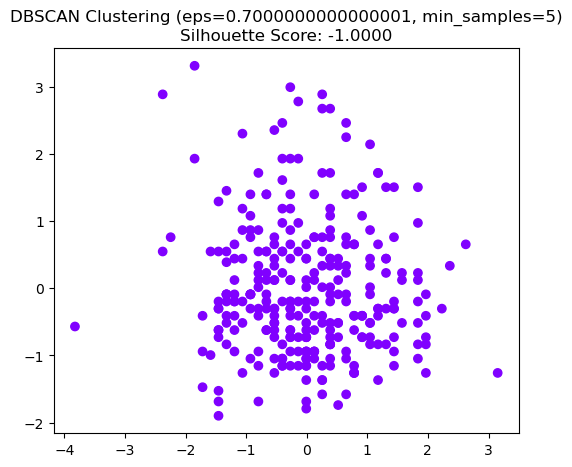

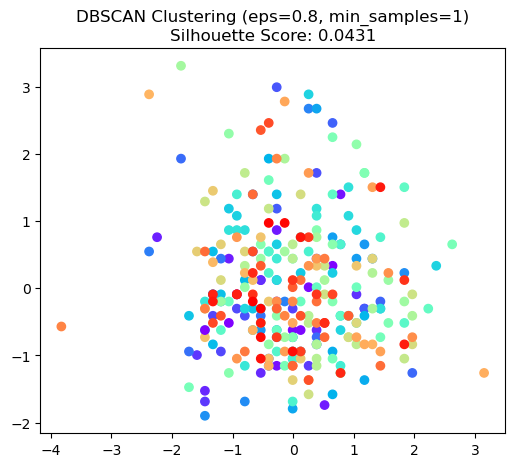

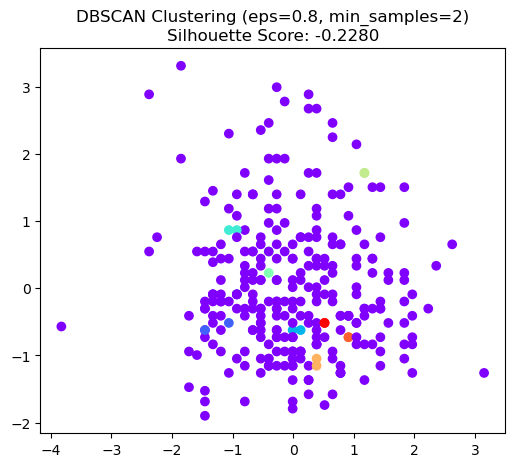

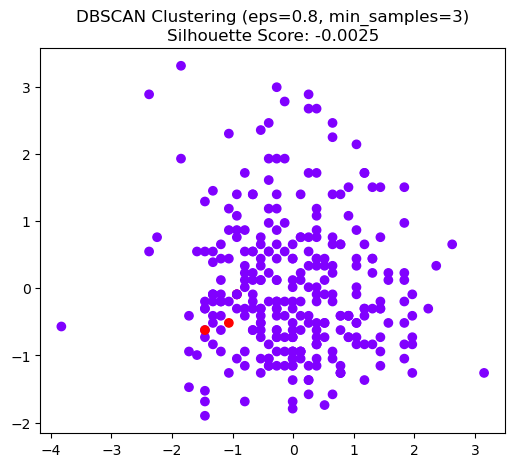

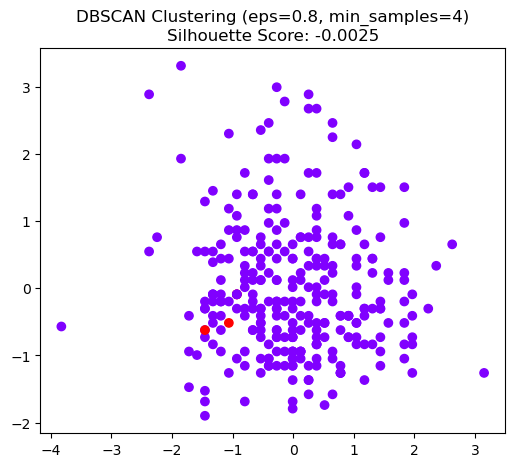

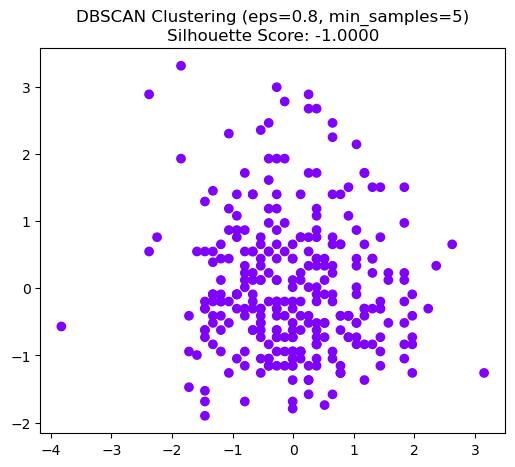

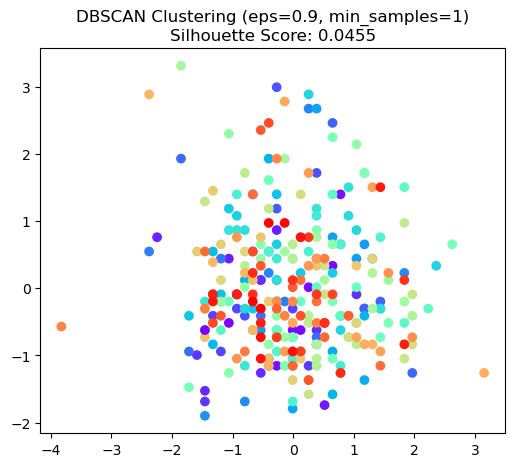

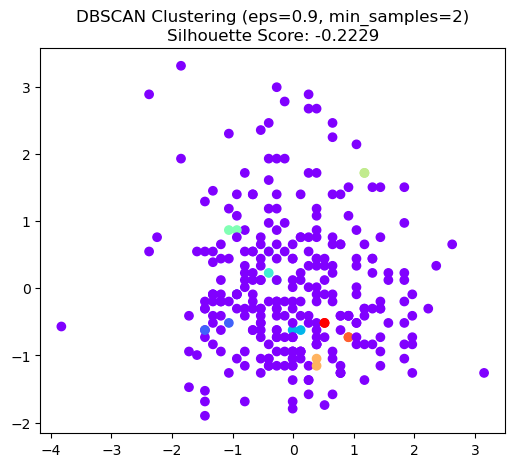

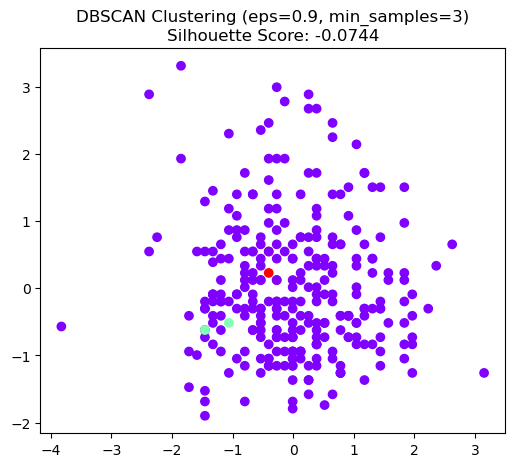

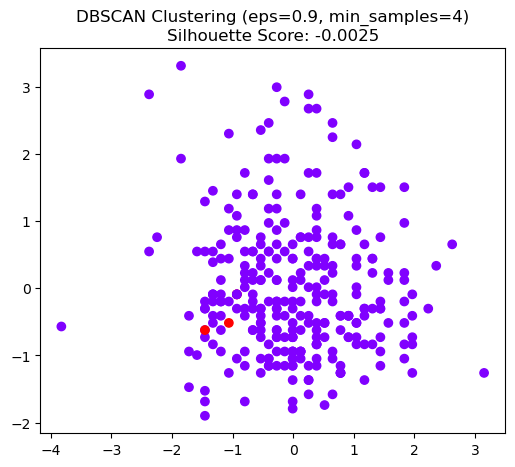

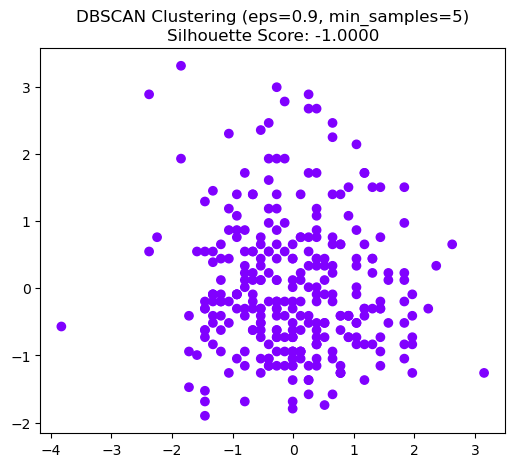

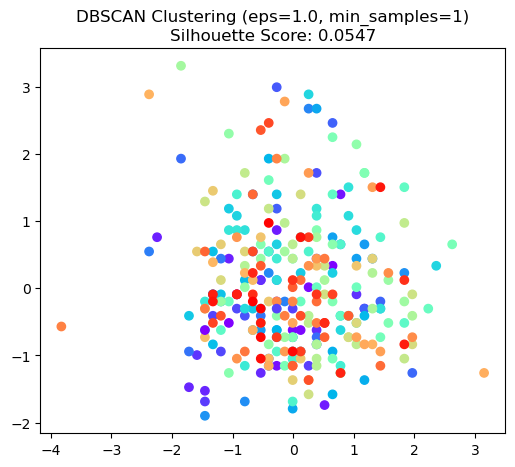

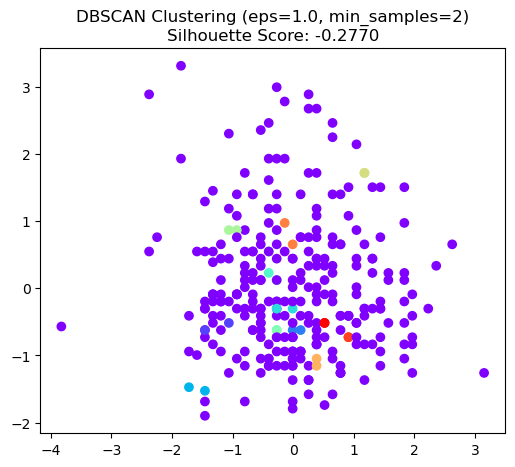

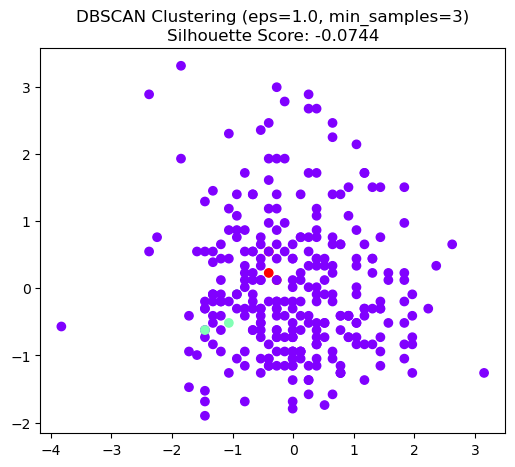

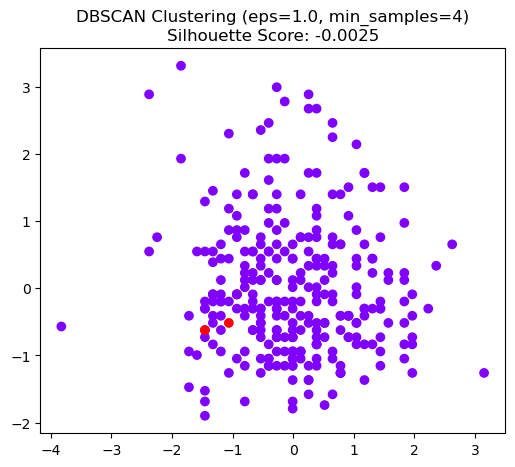

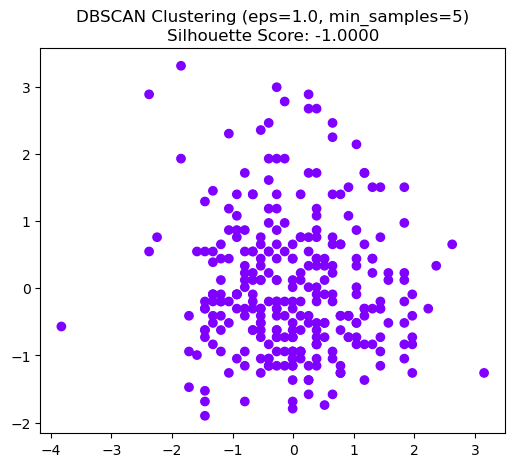

In [56]:
# Function to plot DBSCAN clustering results
def plot_dbscan_results(X, dbscan_results):
    for result in dbscan_results:
        eps, min_samples, silhouette_avg, labels = result
        plt.figure(figsize=(6, 5))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette_avg:.4f}')
        plt.show()

# Plot DBSCAN results
plot_dbscan_results(X_scaled, dbscan_results)

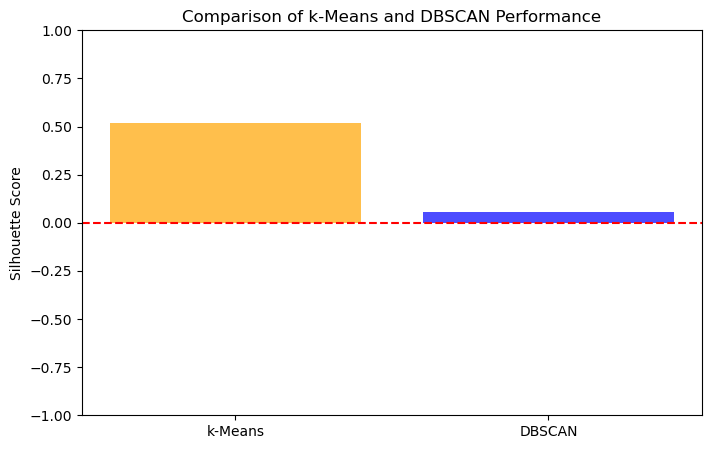

In [57]:
# Plotting the comparison of k-Means and DBSCAN
labels = ['k-Means', 'DBSCAN']
dbscan_silhouette = best_score if best_score > -1 else -1  # Ensure DBSCAN silhouette score is available

silhouette_scores = [kmeans_silhouette, dbscan_silhouette]

plt.figure(figsize=(8, 5))
plt.bar(labels, silhouette_scores, color=['orange', 'blue'], alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparison of k-Means and DBSCAN Performance')
plt.ylim(-1, 1)  # Set limits to visualize silhouette scores
plt.axhline(0, color='red', linestyle='--')  # Adding a line for silhouette score = 0
plt.show()

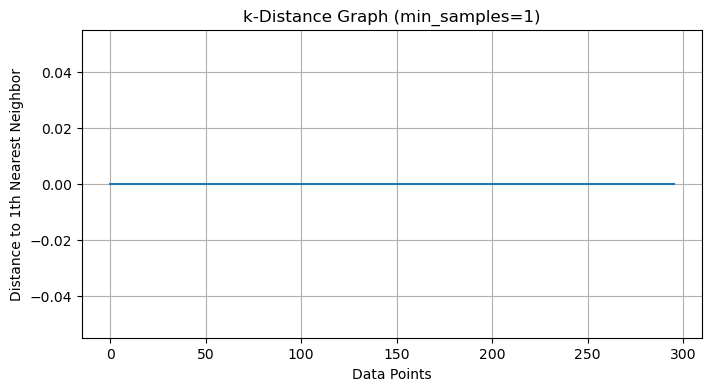

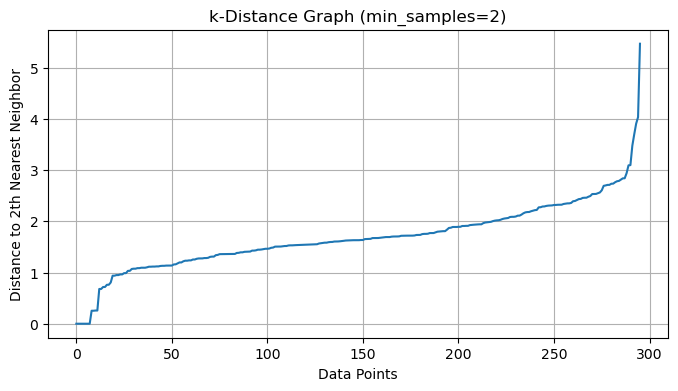

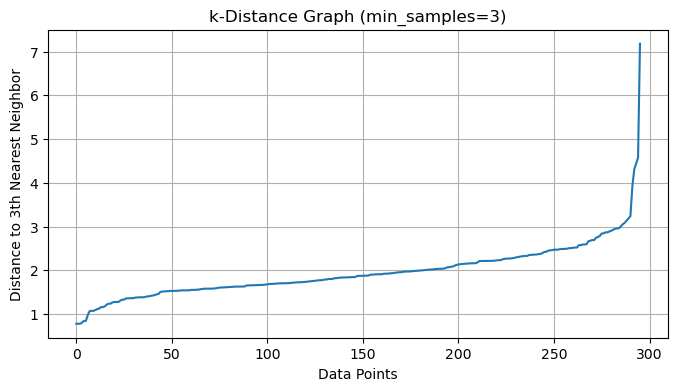

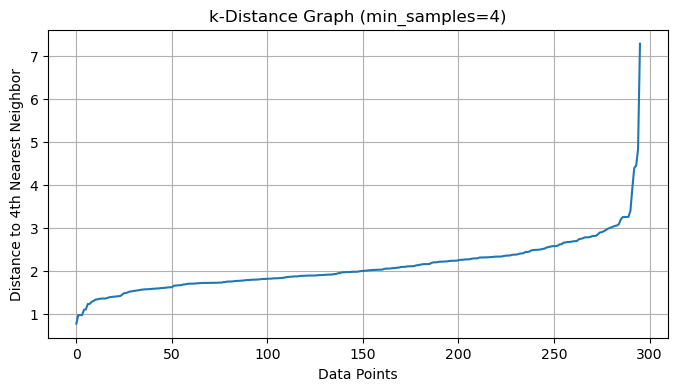

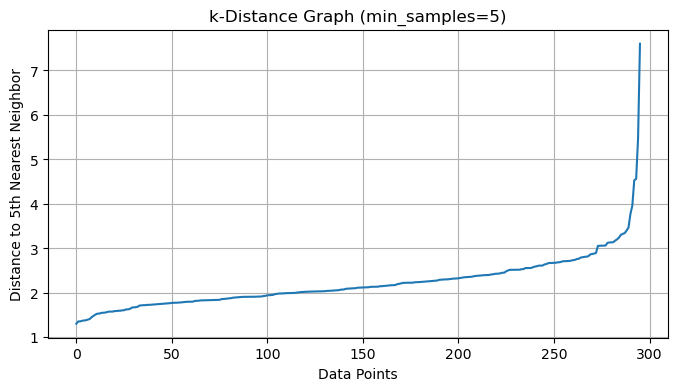

DBSCAN resulted in a single cluster or all points are noise.


In [58]:
# Define the range of min_samples to loop through
min_samples_values = range(1, 6)

# Plot k-distance graphs
for min_samples in min_samples_values:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)
    
    # Sort distances to the k-th nearest neighbor
    distances = np.sort(distances[:, min_samples - 1], axis=0)  # Distance to the k-th nearest neighbor
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.title(f'k-Distance Graph (min_samples={min_samples})')
    plt.xlabel('Data Points')
    plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
    plt.grid()
    plt.show()

# Run DBSCAN after analyzing the k-distance graphs
eps_values = np.arange(0.1, 1.1, 0.1)  # Range of eps values
min_samples = 3  # Example value for min_samples

# Run DBSCAN clustering with a selected min_samples
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)  # Use a suitable eps based on k-distance graphs
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate silhouette score if there are valid clusters
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_avg}")
else:
    print("DBSCAN resulted in a single cluster or all points are noise.")